<a href="https://colab.research.google.com/github/Rupasri20055/Decision-Trees-and-Random-Forests/blob/main/Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


**Load & Prepare Dataset**

In [3]:
df = pd.read_csv("Titanic-Dataset.csv")

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


/tmp/ipython-input-3-1268508598.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-1268508598.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

**Train a Decision Tree Classifier**

In [4]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

# Predict
y_pred_tree = dtree.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8044692737430168

Confusion Matrix:
 [[95 15]
 [20 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       110
           1       0.77      0.71      0.74        69

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**Visualize Decision Tree**

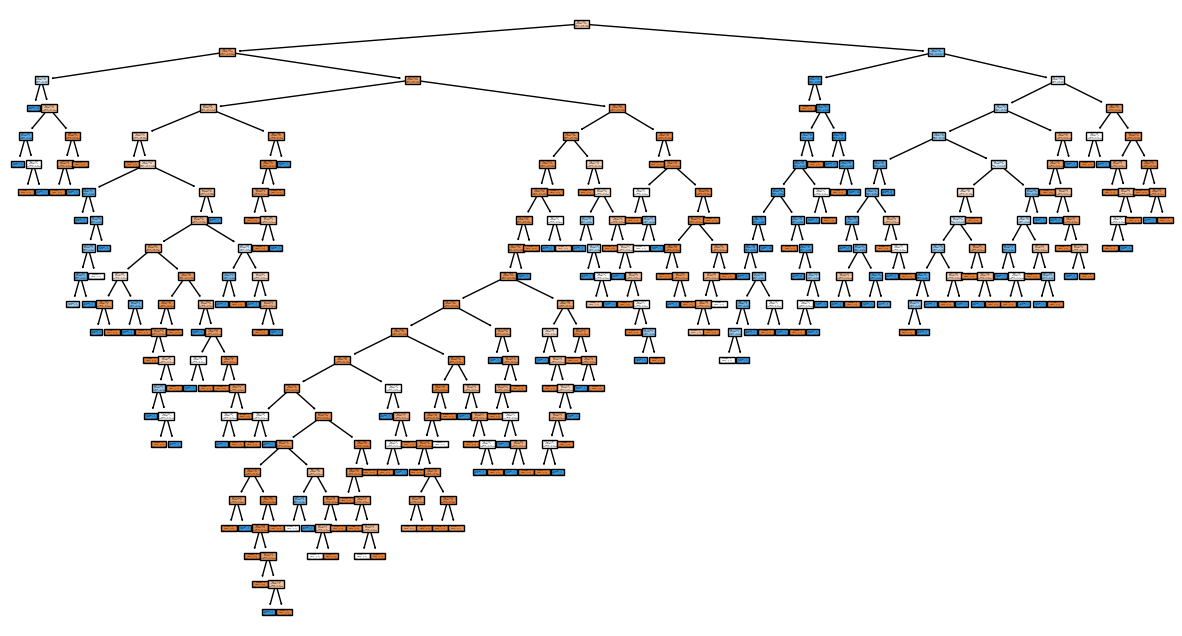

In [5]:
plt.figure(figsize=(15,8))
plot_tree(dtree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


 **Control Tree Depth & Analyze Overfitting**

In [6]:
# Limiting depth to avoid overfitting
dtree_limited = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree_limited.fit(X_train, y_train)

print("Limited Depth Tree Accuracy:", accuracy_score(y_test, dtree_limited.predict(X_test)))


Limited Depth Tree Accuracy: 0.8100558659217877


**Train Random Forest & Compare Accuracy**

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8379888268156425

Confusion Matrix:
 [[99 11]
 [18 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



**Feature Importances**

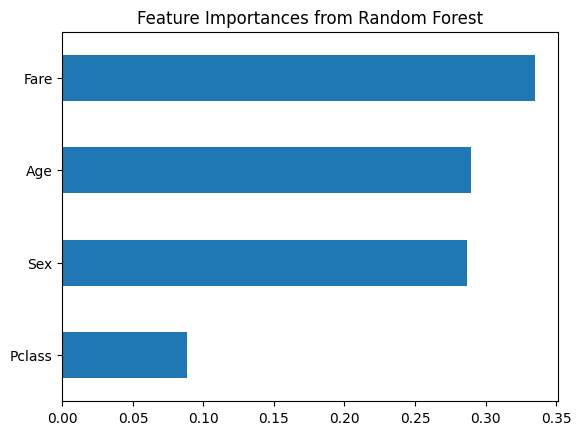

In [8]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances from Random Forest")
plt.show()


**Cross-Validation for Evaluation**

In [9]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation Scores:", scores)
print("Average CV Accuracy:", np.mean(scores))


Cross-validation Scores: [0.77094972 0.80898876 0.84831461 0.79213483 0.83146067]
Average CV Accuracy: 0.810369719414977
